<a href="https://colab.research.google.com/github/parsamirzakhani/ai4032_parsa_mirzakhani/blob/main/miniproject1_parsamirzakhani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

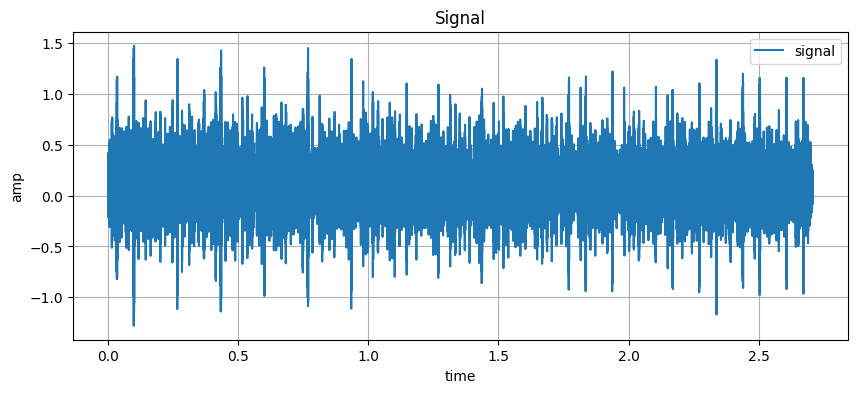

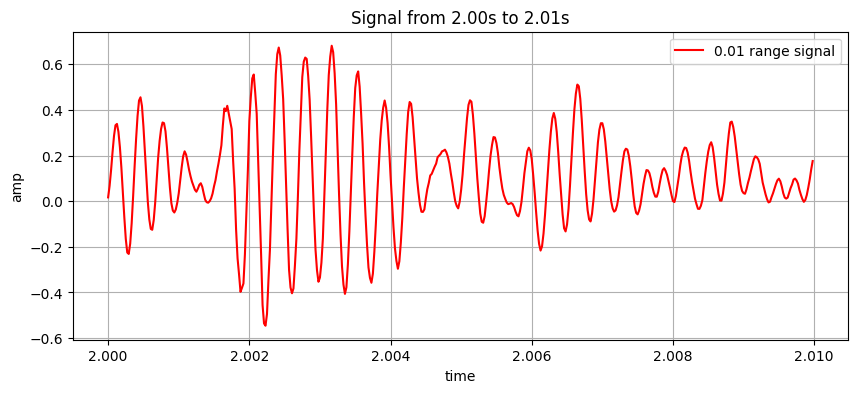

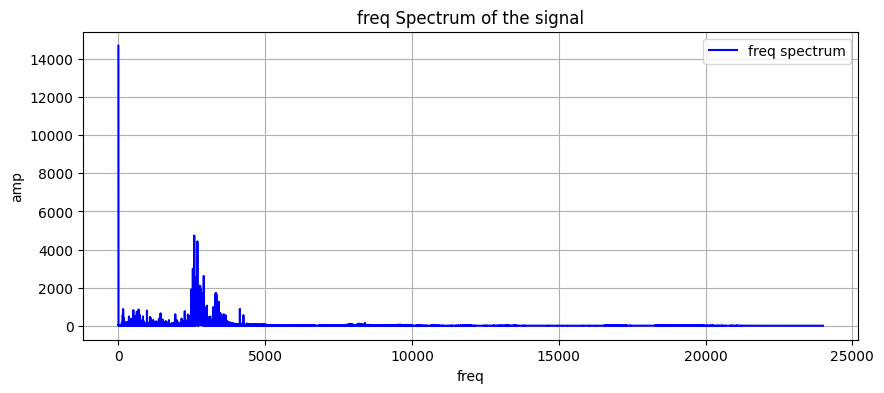

the dominant freq is: None hz


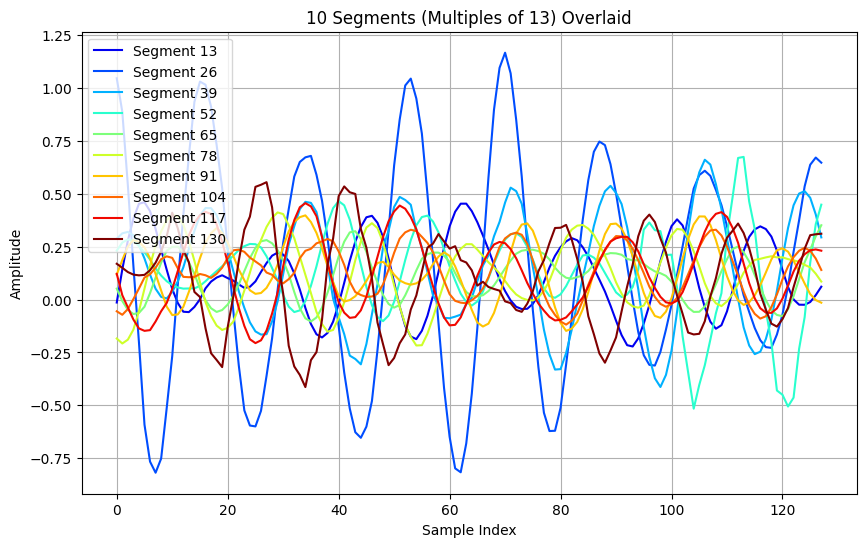

In [53]:
import requests
import numpy as np
import scipy.io as sy
import matplotlib.pyplot as plt
from io import BytesIO
import pandas as pd

address = 'https://engineering.case.edu/sites/default/files/161.mat'
rsp = requests.get(address)
conv_data = sy.loadmat(BytesIO(rsp.content))


signal_key = [key for key in conv_data.keys() if not key.startswith("__")][0]


signal = conv_data[signal_key]

fs = 48000

time = np.arange(len(signal)) / fs


plt.figure(figsize=(10, 4))
plt.plot(time, signal, label="signal")
plt.xlabel("time")
plt.ylabel("amp")
plt.title(f"Signal")
plt.legend()
plt.grid()
plt.show()




start_idx = np.searchsorted(time, 2.00)
end_idx = np.searchsorted(time, 2.01)


plt.figure(figsize=(10, 4))
plt.plot(time[start_idx:end_idx], signal[start_idx:end_idx], label="0.01 range signal", color='r')
plt.xlabel("time")
plt.ylabel("amp")
plt.title(f"Signal from 2.00s to 2.01s")
plt.legend()
plt.grid()
plt.show()





def plot_frequency_spectrum(signal, fs):

    N = len(signal)
    fft_signal = np.fft.fft(signal)
    freqs = np.fft.fftfreq(N, 1/fs)


    half_spectrum = np.abs(fft_signal[:N//2])
    half_freqs = freqs[:N//2]

    plt.figure(figsize=(10, 4))
    plt.plot(half_freqs, half_spectrum, label="freq spectrum", color='b')
    plt.xlabel("freq")
    plt.ylabel("amp")
    plt.title("freq Spectrum of the signal")
    plt.grid(True)
    plt.legend()
    plt.show()



address = 'https://engineering.case.edu/sites/default/files/161.mat'
rsp = requests.get(address)
conv_data = sy.loadmat(BytesIO(rsp.content))

signal_key = [key for key in conv_data.keys() if not key.startswith("__")][0]
signal = conv_data[signal_key].squeeze()

fs = 48000
dom_freq = plot_frequency_spectrum(signal, fs)
print(f"the dominant freq is: {dom_freq} hz")




seg_length = 128
overlap_percentage = 0.5
overlap_length = int(seg_length * overlap_percentage)
step_size = seg_length - overlap_length

segs = []
for i in range(0, len(signal) - seg_length + 1, step_size):
    seg = signal[i:i+seg_length]
    segs.append(seg)

segs_array = np.array(segs)
df = pd.DataFrame(segs_array)
df = pd.DataFrame(segs_array)
plt.figure(figsize=(10, 6))

for i in range(1, 11):
    seg = df.iloc[i * 13 - 1].values
    plt.plot(seg, label=f"segment {i * 13}", color=plt.cm.jet(i / 10))


plt.xlabel("sample index")
plt.ylabel("amp")
plt.title("10 segments multiples of 13")
plt.legend()
plt.grid(True)
plt.show()


def cal_features(signal_segment):
    mean = np.mean(signal_segment)
    std_dev = np.std(signal_segment)
    rms = np.sqrt(np.mean(np.square(signal_segment)))
    return mean, std_dev, rms


features_list = []


for seg in segs_array:
    mean, std_dev, rms = cal_features(seg)
    features_list.append([mean, std_dev, rms])


features_df = pd.DataFrame(features_list, columns=["mean", "std_dev", "rms"])


features_df.to_csv('signal_features.csv', index=False)




In [74]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=42)

train_df = pd.DataFrame(X_train, columns=iris.feature_names)
test_df = pd.DataFrame(X_test, columns=iris.feature_names)

train_df['species'] = iris.target_names[y_train]
test_df['species'] = iris.target_names[y_test]

train_df['dataset'] = 'train'
test_df['dataset'] = 'test'

combined_df = pd.concat([train_df, test_df], ignore_index=True)

print(combined_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.3               2.7                4.9               1.8   
1                4.8               3.4                1.9               0.2   
2                5.0               3.0                1.6               0.2   
3                5.1               3.3                1.7               0.5   
4                5.6               2.7                4.2               1.3   

      species dataset  
0   virginica   train  
1      setosa   train  
2      setosa   train  
3      setosa   train  
4  versicolor   train  
